### 학습 목표
- KAGGLE 경진대회에서 높은 순위를 차지하는 것!!!
- 탑승객의 정보를 바탕으로 생존/사망자 예측
- 머신러닝 학습의 전체 과정에 대한 실습
    - 문제 정의
    - 데이터 수집
    - 탐색적 데이터 분석(EDA) - 데이터를 알아보는 것
    - 데이터 전처리
        - 오타 수정, 결측치/이상치 처리
        - encoding(인코딩) - 범주형 -> 수치형 으로 바꿔줌
        - bining(그루핑) - 수치형 -> 범주형 으로 바꿔줌
        - 정규화/scaling - 값들을 일정 범위로 축소하는 과정 (분산을 줄이는 과정)
        - 편향 제거 
    - 모델 선택 및 학습
        - 모델 생성
        - 특성 선택
        - 하이퍼 파라미터 튜닝(매개변수 조절)
        - 훈련데이터와 평가데이터로 분리 - 과소적합/과대적합 유무 확인
            - 과소적합 : 둘 다 정확도가 낮으면 과소적합
                - 특성이 너무 적어서, 데이터가 너무 적어서, 학습이 너무 적어서
            - 과대적합 : 훈련과 테스트의 차이가 큰 것, 훈련데이터의 정확도가 더 높음
                - 특성이 너무 많아서, 데이터가 너무 적어서, 학습을 너무 많이 해서
    - 평가 : 생성된 모델을 validation 데이터(새로운 데이터)로 평가

### 문제정의
- 머신러닝의 전체과정을 실습
- 타이타닉 데이터에 포함된 데이터의 의미를 분석
- 테스트 데이터로 생존/사망 예측

### 데이터 수집

In [2]:
import pandas as pd

train = pd.read_csv("./data/titanic_train.csv", index_col="PassengerId") 
test = pd.read_csv("./data/titanic_test.csv",index_col="PassengerId") 

### 탐색적 데이터 분석 - 데이터 확인

In [3]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- 컬럼값들의 특징

<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer
  <tr><td>Name<td>이름<td>호칭과 이름으로 구성<td>string
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string    
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>integer
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>    

In [5]:
# 데이터 세부 구성 확인 - 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# 결측치 개수 확인 - True인 경우는 1이므로 더하면 결측치 갯수를 알 수 있음
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# 수치 데이터의 기술통계를 확인(결측치, 분산, 이상치, 편향)
# 결측치 - count를 보면 됨
# 분산 - mean과 std - 평균(mean)보다 더 큰 표준편차(std)를 가진 것이 분산이 큰 것
# 이상치 - 최소값 min 25%    최대값 max 75%에서 확인
# 편향 - mean과 50% 차이가 큰 경우 편향된 것
        # Fare - mean 32.204, 50%  14.454 편향됨을 알 수 있음
# std - 표준편차
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 데이터 전처리 & EDA

#### 결측치 처리
- 수정(채우기)
    - 기술통계(평균, 중앙값)
    - 다른 칼럼과 비교해서 해당 값으로 변경
    - 결측치만 따로 다른 값으로 설정
- 삭제
    - 텍스트마이닝에서 주로 삭제 사용
    - 데이터가 충분히 많은 경우에도 삭제
    - 감탄사 같은 것들

#### 나이의 결측치 채우기 - 다른 컬럼의 통계값을 활용
- 비교 컬럼은 나이 컬럼과 상관관계가 높은 컬럼을 활용
- 비교 컬럼은 범주형 데이터인 컬럼을 활용
- 사용할 컬럼 : Pclass, Sex

In [8]:
# 상관관계 분석 - corr()
# 연속형(숫자로 표현 가능한) 데이터에 대해서만 상관관계 분석이 가능하다.
# 절대값이 1에 가까울수록 상관관계가 높음
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
# 피벗 테이블을 활용해서 그룹핑
# values : 결측치를 채우고자 하는 컬럼명
# index : 참고하고자 하는 컬럼명을 리스트로 나열
# aggfunc : 참고하고자 하는 컬럼의 값들 계산하는 방법
pt1 = train.pivot_table(values='Age',
                        index=['Pclass','Sex'],
                        aggfunc='mean')

In [10]:
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [11]:
# 피벗 테이블 접근 방법
pt1.loc[1,"female"]

Age    34.611765
Name: (1, female), dtype: float64

In [12]:
import numpy as np

# 결측치 채우기 함수
def fillAge(row):
    # 넘어온 데이터에서 Age 컬럼이 결측치라면
    if np.isnan(row['Age']):
        # 피벗 테이블을 검색해서 해당 값을 넣어줌
        return pt1.loc[row['Pclass'],row['Sex']]
    # 넘어온 데이터에서 Age 컬럼이 결측치가 아니라면
    else:
        return row['Age']

In [13]:
# apply() 함수를 이용해서 결측치 채우기
# 특정 열 또는 특정 행에 함수를 적용

# train.apply(): 한 줄씩 데이터가 함수로 넘어감
# axis = 1 : 한 행 단위로 데이터를 넘김
# astype('int64') : 실수로 된 나이 평균 값을 정수로 변환해서 저장
train['Age'] = train.apply(fillAge, axis=1).astype("int64")

In [14]:
train.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,26,0,0,330877,8.4583,NaN,Q


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [16]:
test['Age'] = test.apply(fillAge, axis=1).astype("int64")

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### 훈련 데이터의 Embarked 결측치 채우기
- 결측치 개수가 적은 경우
    - 범주형 데이터의 결측치는 가능하면 많은 개수를 가진 클래스에 포함
        - 개수가 많은 쪽에 포함시켜야 원래 클래스에 영향을 덜 줌

- 결측치 개수가 데이터 수만큼 많은 경우
    - 새로운 클래스 값으로 할당
    - 원래 클래스의 비율별로 쪼개서 랜덤으로 할당

In [18]:
# embarked 컬럼의 클래스 종류 확인
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
# embarked 컬럼의 클래스별 데이터 수 확인
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# embarked 컬럼의 결측치 수 확인
train['Embarked'].isnull().sum()

2

In [21]:
# 결측치가 2개, 최빈값(S)으로 결측치를 채움
# 전체 결측치를 한번에 채우는 함수 : fillna()
train['Embarked'] = train['Embarked'].fillna('S')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


#### Fare 결측치 채우기 - test데이터

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [24]:
# 등급에 따라 Fare의 값이 확연히 다름
# 이상치가 큼
# 중앙값을 사용해서 결측치 채우기 - median
# 사용할 컬럼 Pclass, Sex

# 결측치 있는 행은 PassengetId - 1044, 7.8958로 채움
pt2 = test.pivot_table(values='Fare',
                       index=['Pclass','Sex'],
                       aggfunc='median')
pt2

Fare
Pclass Sex             
1      female  79.02500
       male    51.86250
2      female  26.00000
       male    13.00000
3      female   8.08125
       male     7.89580

In [25]:
# 등급, 성별 확인을 위해 결측치가 있는 행을 확인
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [26]:
# 결측치 채우기 - fillna()
test['Fare'] = test['Fare'].fillna(7.8958)

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### Cabin 결측치 채우기
- 객실번호 영문자(층)+숫자로 구성
- 객실번호 범주형 데이터인데 클래스 수가 너무 많고 클래스별 데이터 개수는 대부분 1개-ex.C100, C200
    - 객실번호를 유사한 그룹으로 그룹핑 해주어야 함
- 그룹핑의 기준은 영문자(층)이 생존/사망에 영향을 미치는 주요 데이터로 고려

In [28]:
train['Cabin'].isnull().sum()

687

In [29]:
test['Cabin'].isnull().sum()

327

In [30]:
# 객실번호의 결측치는 실제 객실 없느 ㄴ경우일 거라고 판단하여 새로운 클래스 M GKFEKD
train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [31]:
train['Cabin'].unique()

array(['M', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
# 각 값들의 첫번째 영문자만 잘라서 저장
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

In [33]:
train["Cabin"].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [34]:
train["Cabin"].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### 데이터 시각화(EDA)
- 그래프 그리기
- train 데이터를 이용해 탐색

#### 범주형 데이터 시각화
- 빈도 기반의 bar chart 많이 활용

##### Cabin 시각화
- seaborn 라이브러리 활용

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='Cabin', ylabel='count'>

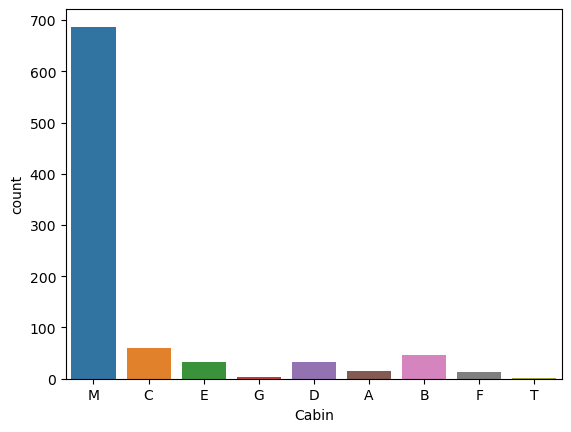

In [36]:
sns.countplot(data = train,
               x = 'Cabin')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

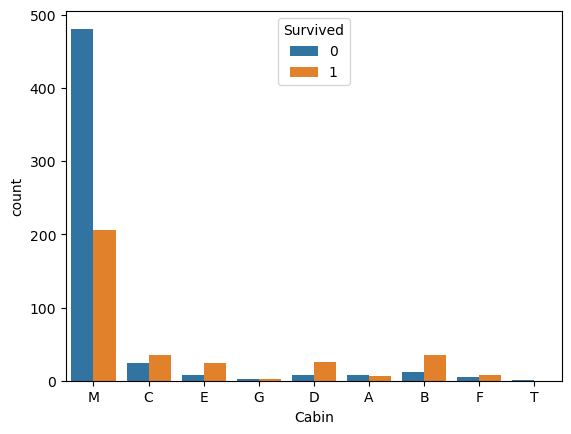

In [37]:
sns.countplot(data = train,
               x = 'Cabin',
               hue = 'Survived')

- M에서 상대적으로 많은 사망자가 분포해 있따. 모델에게 학습을 시켜봐도 의미가 있을 것 같다!

##### Pclass 시각화

<AxesSubplot:xlabel='count', ylabel='Pclass'>

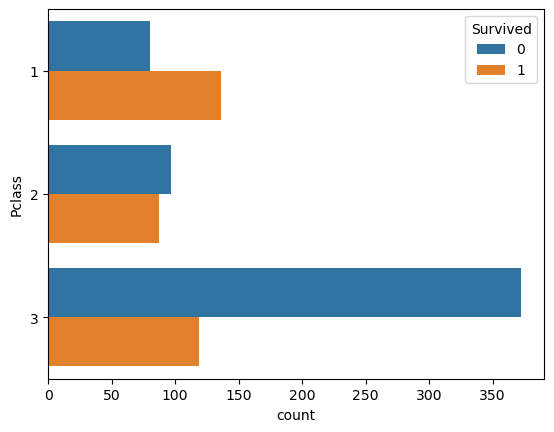

In [38]:
sns.countplot(data = train,
              y = 'Pclass',
              hue = 'Survived')

- 1등급에 탑승하면 생존 확률이 조금 더 높다.
- 3등급에 탑승하면 사망 확률이 더 높다.
- Pclass를 모델 학습에 사용해도 괜찮을 것 같다.

##### Pclass와 Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

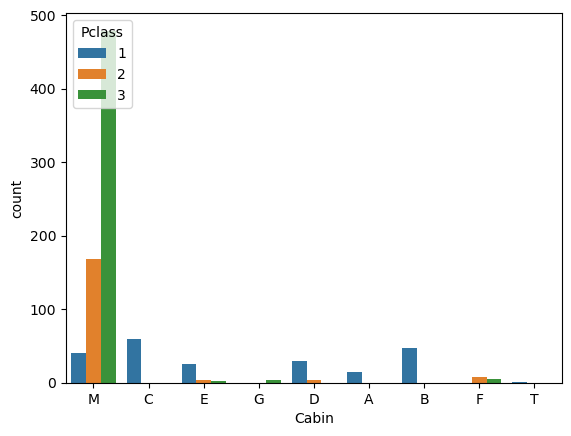

In [39]:
sns.countplot(data = train,
              x = 'Cabin',
              hue = 'Pclass')

- A, B, C는 1등급 탑승객들이 있다.
- M은 3등급 탑승객이 많다. --> 3등급 탑승객들이 많이 사망해서 정보가 손실된 걸까?

##### Embarked, Sex 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

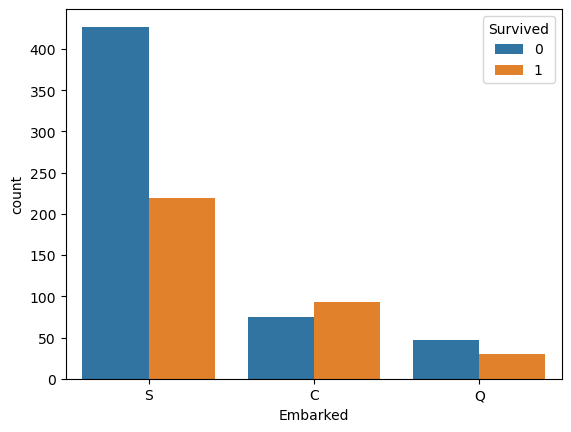

In [40]:
sns.countplot(data=train,
              x = 'Embarked',
              hue = 'Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

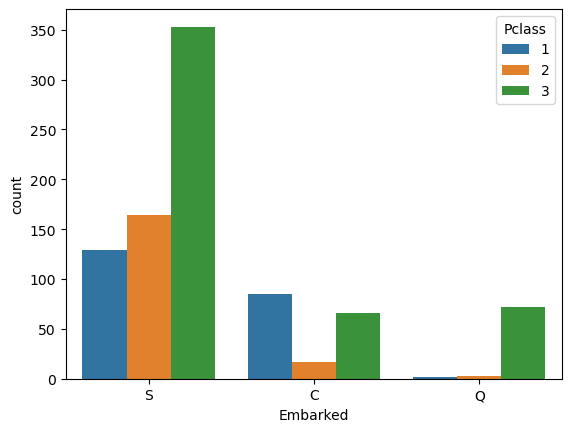

In [41]:
sns.countplot(data=train,
              x = 'Embarked',
              hue = 'Pclass')
# 이 그래프는 애매함, ? 느낌임

<AxesSubplot:xlabel='Sex', ylabel='count'>

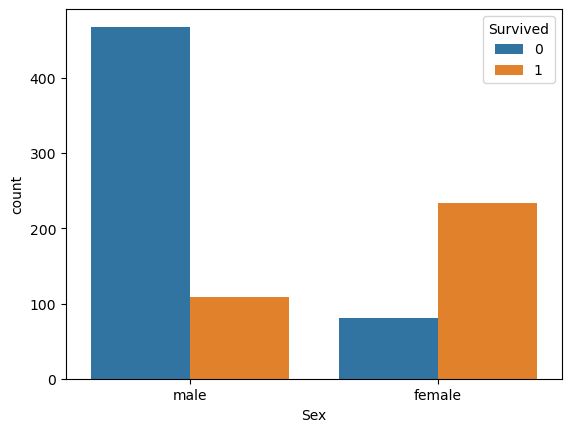

In [42]:
sns.countplot(data=train,
              x='Sex',
              hue='Survived')

#### 수치형 데이터
- 구간을 나눠서 종합하는 히스토그램
- 커널 밀도 추정 그래프

In [43]:
import matplotlib.pyplot as plt

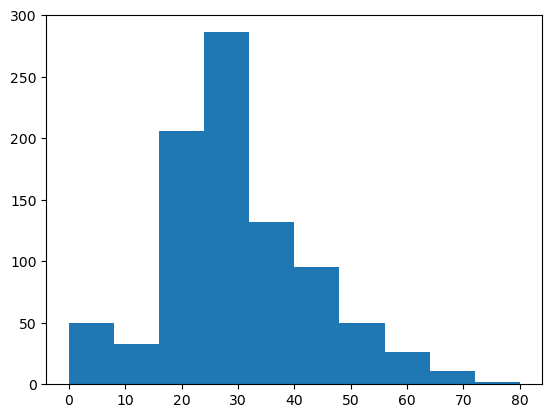

In [44]:
plt.hist(train['Age'])
plt.show()

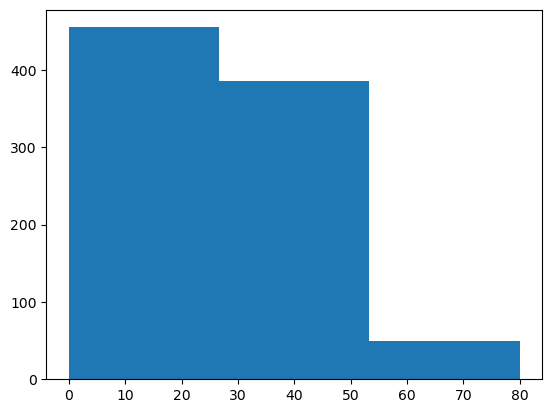

In [45]:
plt.hist(train['Age'], bins=3)
plt.show()

##### Age 시각화

<AxesSubplot:ylabel='Age'>

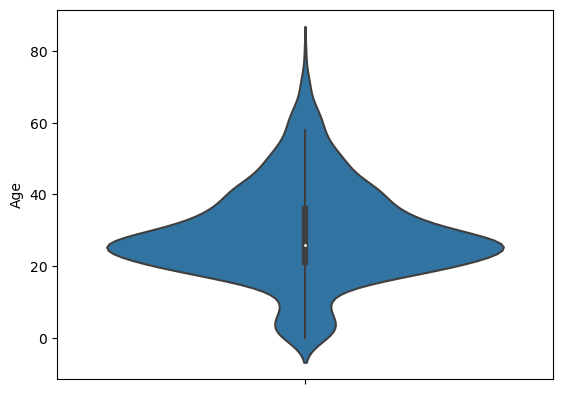

In [46]:
sns.violinplot(data=train, 
               y ='Age')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

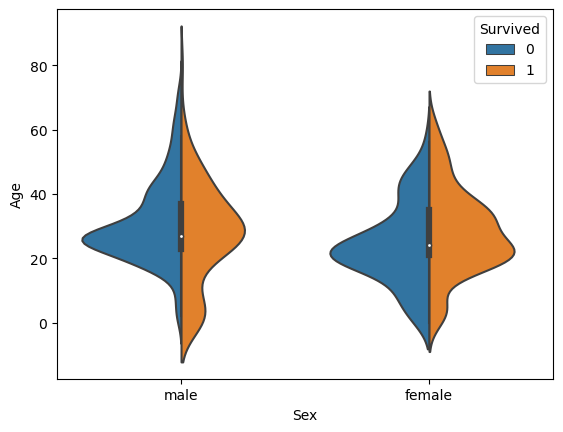

In [47]:
sns.violinplot(data=train, 
               y ='Age', x ='Sex', hue='Survived',
               split=True)

- 남성은 20대가 조금 더 많이 사망
- 어린아이 중에서는 남자아이가 여자아이보다 상대적으로 생존 확률이 높다 (시대적 배경?)

#### Fare 컬럼 시각화

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

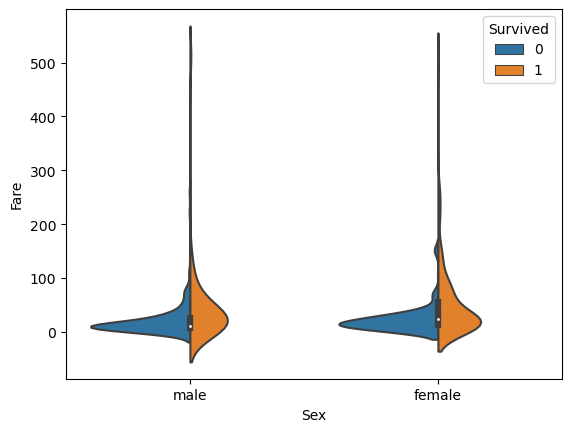

In [48]:
sns.violinplot(data=train, 
               y ='Fare', x ='Sex', hue='Survived',
               split=True)

- 낮은 요금을 지불한 탑승객들이 많이 사망했따.
- 전체 요금이 0~40달러 사이에 많이 분포 되어있다.

#### 특성공학
- SibSp, Parch를 합쳐서 가족이라는 새로운 컬럼 생성

In [49]:
# 가족의 수(새 컬럼 생성)
#시리즈 끼리 연산이 가능함!(+1 은 1인가구)
train['Family_Size'] = train['SibSp']+train['Parch']+1

In [50]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2


In [51]:
test['Family_Size'] = test['SibSp']+test['Parch']+1

In [52]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,1


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

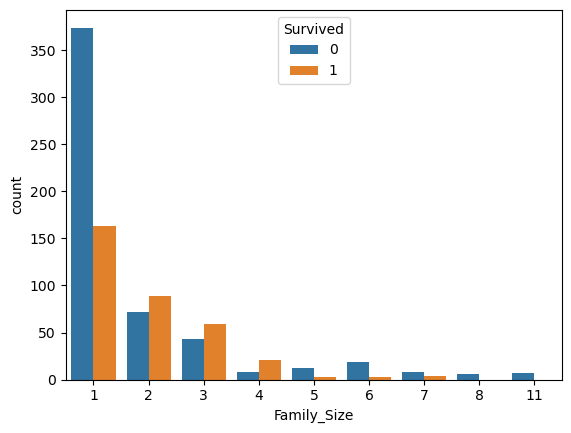

In [53]:
sns.countplot(data=train,
              x='Family_Size',
              hue='Survived')

- 1명일 경우 사망자가 훨씬 많다.
- 2~4명일 경우 생존자가 조금 더 많다.
- 5명 이상일 경우 사망자가 더 많다.
- Family_Size라는 수치 데이터를 그대로 사용할 수도 있지만, 범주형 데이터로 변환시켜 보자!
- Binning(수치형 -> 범주형) : 사소한 관찰 오류를 줄일 수 있음(모델의 단순화 유도)

#### 특성공학
- Family_Size가 1이면 Alone, 2~4이면 Small, 5명 이상이면 Large 범주로 변경.
- cut 함수 활용

In [54]:
bins = [0,1,4,20]      # 구간
labels = ['Alone', 'Small', 'Large']  # 구간 별 범주 이름
train['Family_Group'] = pd.cut(x=train['Family_Size'],
                                  bins = bins,
                                  labels=labels)

In [55]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small


In [56]:
test['Family_Group'] = pd.cut(x=test['Family_Size'],
                                  bins = bins,
                                  labels=labels)

In [57]:
test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,1,Alone
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,M,S,2,Small
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,M,Q,1,Alone
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,M,S,1,Alone
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,M,S,3,Small


#### 특성공학
- text 데이터 다루기(비정형 데이터)
- Name 컬럼 : 중간의 호칭만 추출하여 정형화 시키자!

In [58]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [59]:
# Mr. , Mrs. 호칭 정보만 전처리 하는법!
'Braund, Mr. Owen Harris'.split(',')

['Braund', ' Mr. Owen Harris']

In [60]:
'Braund, Mr. Owen Harris'.split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [61]:
'Braund, Mr. Owen Harris'.split(',')[1].split('.')[0]

' Mr'

In [62]:
'Braund, Mr. Owen Harris'.split(',')[1].split('.')[0].strip() 
#strip() : 띄어쓰기 공백 지워줌

'Mr'

In [63]:
def split_title(row):
    return row.split(',')[1].split('.')[0].strip() 

In [64]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small


In [65]:
train['Title']= train['Name'].apply(split_title)

In [66]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small,Mr


In [67]:
test['Title']= test['Name'].apply(split_title)

In [68]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,1,Alone,Mr


In [69]:
# 호칭 종류 확인
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

(0.0, 20.0)

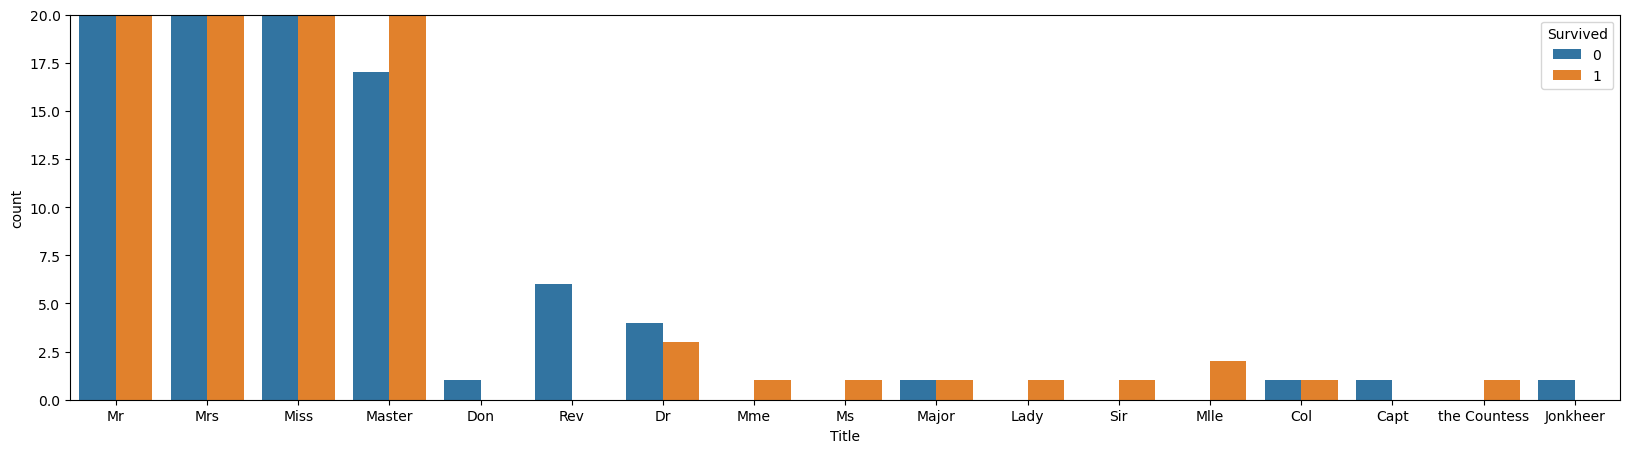

In [70]:
# 호칭 빈도수 확인
plt.figure(figsize=(20,5))    # 가로, 세로
sns.countplot(data=train,
             x = 'Title',
             hue='Survived')
plt.ylim(0,20)

- Mr, Mrs, Miss : 성별과 관련있는 호칭, 머신러닝 모델 학습에 이용해봐도 괜찮을 것 같다.
- 나머지 호칭들은 인원수가 적고 종류가 많아서 범주를 통합시켜봐도 괜찮을 것 같다.

In [71]:
title_dic = {'Mr' : 'Mr',
            'Mrs' : 'Mrs',
            'Miss' : 'Miss',
            'Master' : 'Master',
            'Mme' : 'Miss',
            'Lady' : 'Miss',
            'Don' : 'Other',
            'Rev' : 'Other',
            'Dr' : 'Other',
            'Ms' : 'Miss',
            'Major' : 'Other',
            'Sir' : 'Other',
            'Mlle' : 'Other',
            'Col' : 'Other',
            'Capt' : 'Other',
            'the Countess' : 'Other',
            'Jonkheer' : 'Other',
            'Dona' : 'Other'}

In [72]:
# Title을 단순화 시킨 Title2라는 새 컬럼 생성
train['Title2'] = train['Title'].map(title_dic)

In [73]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title,Title2
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small,Mr,Mr


In [74]:
train['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [75]:
test['Title2'] = test['Title'].map(title_dic)

In [76]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title,Title2
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,1,Alone,Mr,Mr


In [77]:
test['Title2'].unique()
# 결측치 - train에는 없는 호칭이 test에 존재했음!

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [78]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

#### 티켓 정보는 사용하지 않겠다.
#### 사용하지 않을 컬럼 정리

In [79]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Group', 'Title',
       'Title2'],
      dtype='object')

In [80]:
train.drop(['Name','Ticket','Title'], axis=1, inplace=True)
test.drop(['Name','Ticket','Title'], axis=1, inplace=True)

In [81]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Group,Title2
PassengerId,,,,,,,,,,,,
1,0,3,male,22,1,0,7.2500,M,S,2,Small,Mr
2,1,1,female,38,1,0,71.2833,C,C,2,Small,Mrs
3,1,3,female,26,0,0,7.9250,M,S,1,Alone,Miss
4,1,1,female,35,1,0,53.1000,C,S,2,Small,Mrs
5,0,3,male,35,0,0,8.0500,M,S,1,Alone,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0000,M,S,1,Alone,Other
888,1,1,female,19,0,0,30.0000,B,S,1,Alone,Miss
889,0,3,female,21,1,2,23.4500,M,S,4,Small,Miss


### 모델링
- 인코딩(문자형태의 데이터를 숫자형태의 데이터로 변환)
    1. label encoding
    2. one-hot encoding
        - 범주형 변수를 표현하는데 가장 널리 쓰이는 방법
        - 분류하고자 하는 범주(종류)만큼의 자릿수(컬럼)를 만들고 1과0만을 이용하여 표현하는 방식
- 모델 선택 및 하이퍼파라미터 조정
- 모델 학습
- 모델 평가

In [82]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_Size', 'Family_Group', 'Title2'],
      dtype='object')

In [83]:
categorical_features = ['Sex', 'Cabin', 'Embarked', 'Family_Group', 'Title2']

In [84]:
pd.get_dummies(train['Title2'])

,Master,Miss,Mr,Mrs,Other
PassengerId,,,,,
1,0,0,1,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,1,0,0
...,...,...,...,...,...
887,0,0,0,0,1
888,0,1,0,0,0
889,0,1,0,0,0


In [85]:
# 원-핫 인코딩
pd.get_dummies(train['Title2'])

,Master,Miss,Mr,Mrs,Other
PassengerId,,,,,
1,0,0,1,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,1,0,0
...,...,...,...,...,...
887,0,0,0,0,1
888,0,1,0,0,0
889,0,1,0,0,0


In [86]:
for feature_name in categorical_features:
    one_hot = pd.get_dummies(train[feature_name], prefix=feature_name)   #원 핫 인코딩
    train.drop(feature_name, axis=1, inplace=True)   # 기존 글자형태 컬럼 삭제
    train=pd.concat([train, one_hot], axis=1)    # 기존 데이터에 원-핫 데이터 붙이기

In [87]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22,1,0,7.2500,2,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,1,1,38,1,0,71.2833,2,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,3,26,0,0,7.9250,1,1,0,0,...,0,1,1,0,0,0,1,0,0,0
4,1,1,35,1,0,53.1000,2,1,0,0,...,0,1,0,1,0,0,0,0,1,0
5,0,3,35,0,0,8.0500,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0


In [88]:
for feature_name in categorical_features:
    one_hot = pd.get_dummies(test[feature_name], prefix=feature_name)   #원 핫 인코딩
    test.drop(feature_name, axis=1, inplace=True)   # 기존 글자형태 컬럼 삭제
    test=pd.concat([test, one_hot], axis=1)    # 기존 데이터에 원-핫 데이터 붙이기

In [89]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,0,0,7.8292,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
893,3,47,1,0,7.0000,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
894,2,62,0,0,9.6875,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
895,3,27,0,0,8.6625,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
896,3,22,1,1,12.2875,3,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [90]:
# train, test의 차집합 연산!
set(train.columns) - set(test.columns)

{'Cabin_T', 'Survived'}

In [91]:
test['Cabin_T']=0

##### 문제와 정답으로 나누기

In [92]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [93]:
X_test = test
# y_test => kaggle에 있음!

In [94]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [95]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other', 'Cabin_T'],
      dtype='object')

In [96]:
# train, test 컬럼 순서 맞추기!
X_test = X_test[X_train.columns]

In [97]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [98]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

### 모델 선택

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [98]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

#####  train, validation 분리

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [101]:
X_train.shape, y_train.shape

((668, 28), (668,))

In [102]:
X_val.shape, y_val.shape

((223, 28), (223,))

##### 학습 및 평가

In [121]:
knn_model.fit(X_train, y_train) # 학습 메소드

KNeighborsClassifier(n_neighbors=149)

In [104]:
tree_model.fit(X_train, y_train)  # 학습 메소드

DecisionTreeClassifier()

In [105]:
print(knn_model.score(X_val, y_val))
print(tree_model.score(X_val, y_val))

0.7040358744394619
0.8026905829596412


C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### 교차검증

In [106]:
X_train.shape, y_train.shape

((668, 28), (668,))

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
# cross_val_score(모델, 문제데이터, 정답데이터, 몇 겹(k))
knn_result = cross_val_score(knn_model, X_train, y_train, cv=5)
knn_result

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.73880597, 0.68656716, 0.70895522, 0.80451128, 0.66917293])

In [109]:
knn_result.mean()

0.7216025137470542

In [110]:
import warnings
# 경고 라이브러리
warnings.filterwarnings('ignore')

In [111]:
tree_result = cross_val_score(tree_model, X_train, y_train, cv=5)
print(tree_result)
tree_result.mean()

[0.70895522 0.74626866 0.76865672 0.82706767 0.79699248]


0.769588149478173

##### KNN모델에 Scaler 적용

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()

In [114]:
scaler.fit(X_train)  # 1번만 해줌!

StandardScaler()

In [115]:
transform_X_train = scaler.transform(X_train)   # 변환

In [116]:
transform_X_test = scaler.transform(X_test)   # 변환

In [117]:
result = cross_val_score(knn_model, transform_X_train, y_train)
print(result)
result.mean()

[0.7761194  0.75373134 0.81343284 0.78947368 0.80451128]


0.7874537088991135

##### 하이퍼 파라미터 튜닝

In [118]:
score_list =[]
for k in range(1, 150, 2):   # 이웃이 작으면 복잡, 많으면 단순
    knn_model = KNeighborsClassifier(n_neighbors=k)  # 이웃에 따른 모델 생성
    knn_result = cross_val_score(knn_model, transform_X_train, y_train, cv=5)  # 교차검증 성능
    score_list.append(knn_result.mean())   # 평균치 리스트에 담기

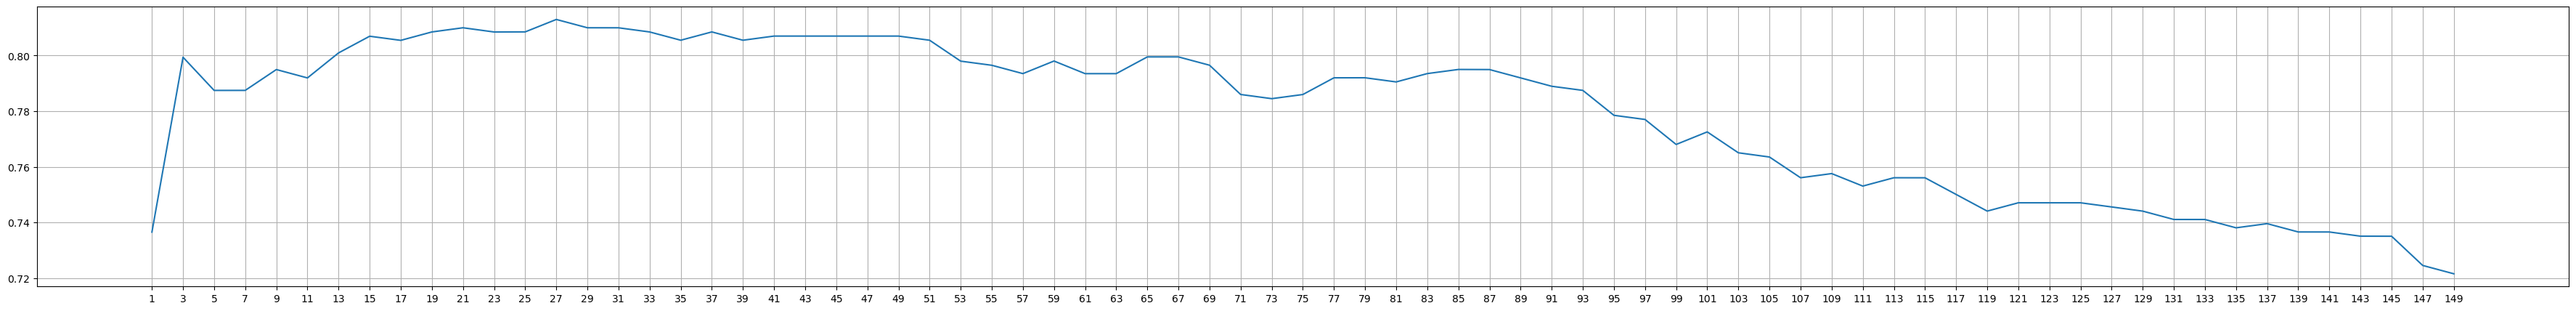

In [119]:
plt.figure(figsize=(45, 5))
plt.plot(range(1, 150, 2), score_list)
plt.xticks(range(1, 150, 2))
plt.grid()
plt.show()

### 평가 결과 제출

In [122]:
pre = knn_model.predict(X_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [125]:
# kaggle에 y_test가 있어 업로드 해야함
result = pd.read_csv('data/titanic_gender_submission.csv')
result['Survived'] = pre
result.to_csv('jyg_submission_01.csv',index=False)